In [255]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [256]:
# importing the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [257]:
# Familiarisation with the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [258]:
data.shape

(150, 5)

In [259]:
data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [260]:
# Statistical view of the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [261]:
# Checking the distinct values in the  dependent variable column
data['Species'].unique()

array([0, 1, 2])

In [264]:
# Assigning the value 1 to the Iris-Versicolour and Iris-Virginica
data['Species'] = np.where(data['Species'] == '2', '1', data['Species'])
data['Species'].unique()

array(['0', '1'], dtype=object)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

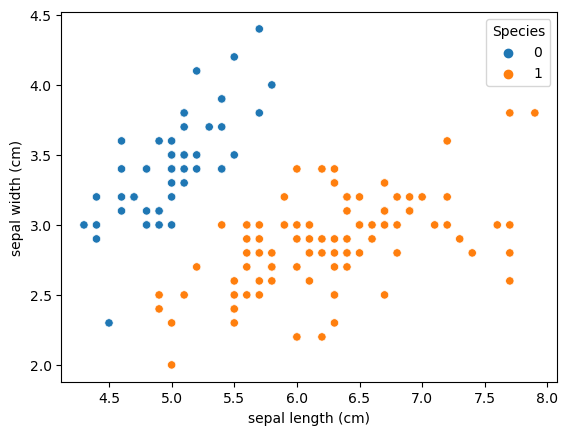

In [265]:
# Visualisation of the trends between the variables using a scatter plot
sns.scatterplot(data, x = "sepal length (cm)", y = "sepal width (cm)" , hue = "Species")

In this visaulisation the specias 1 are overlapping with the range with longer sepal length than species 0. Species 0 have larger sepal width than length and they are the group with the largest width.

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

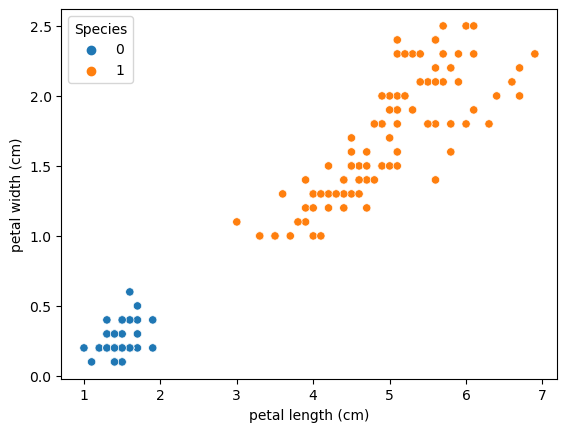

In [266]:
sns.scatterplot(data, x = "petal length (cm)", y = "petal width (cm)" , hue = "Species")

In the case of the petal variables we can see that the species marked 0 have the smallest petals and Species 1 have the largest.

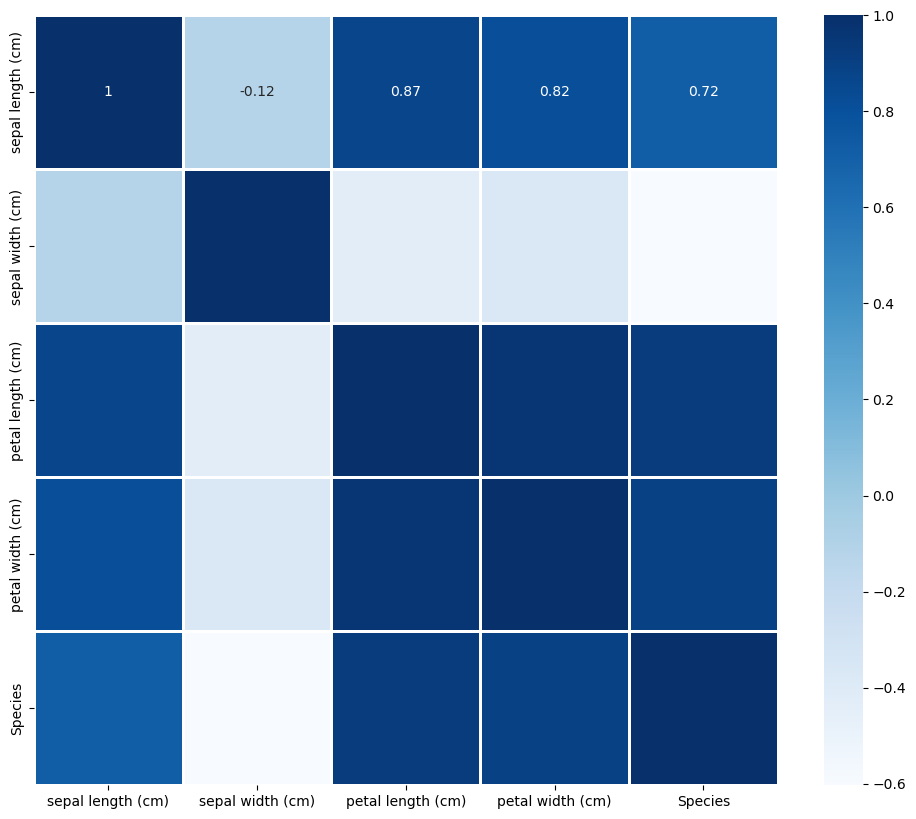

In [267]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths=2)
plt.show()

The correlation plot shows that apart of sepal width the correlations between the other variables are very strong.

In [268]:
# Split the dataset and assign the variables
# The petal measurments are the independent variables and the species the target variables
X = data.iloc[:,[0,1,2,3]].values
y = data.iloc[:,4].values


In [269]:
# Reshape the data and scale the data
X = X.reshape(-1, 4)
X = preprocessing.scale(X)
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1'], dtype=object)

In [270]:
# Split the data into a training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [271]:
# Using the logistic Regression function fit a model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)




LogisticRegression()

In [272]:
# Make a predictions on test data
y_pred = log_reg.predict(X_test_scaled)
y_pred


array(['1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0',
       '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '0', '0'], dtype=object)

In [273]:
# Measure the accuracy of the model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))
print("Classification Report: \n " , classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report: 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The model shows very high accuracy, which suggests this is a very efficient logistic regression model for the predictions. The high accuracy of 1 also confirms this observation as well as the Classification report.

In [274]:
# Apply confusion matrix
# classes = list(iris.target)
# cm = confusion_matrix(y_test, y_pred)
# cm_data = pd.DataFrame(cf_matrix, columns=classes, index=classes)
# cm_data
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  0]
 [ 0 20]]


The confusion matrix shows high values for the TP and TN values. this is also confirmed by the above classification report by matching the numbers of true and negative positives and negative with the original data.